In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(housing), housing.keys()

(sklearn.utils._bunch.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']))

In [5]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y = pd.DataFrame(housing.target, columns=['target'])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
# Splitting, full_train, test
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
# Splitting X_train_full for validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [8]:
# Creating layers
LAYERS = [
    tf.keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
]

In [9]:
# Initializing model
model = tf.keras.models.Sequential(LAYERS)

In [10]:
# Defining loss and optimizer
LOSS= 'mse'
OPTIMIZER = 'sgd'

# Compiling model
model.compile(loss=LOSS, optimizer=OPTIMIZER)

In [11]:
# Printing summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Scaling - if not scaled can be output loss as nan
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 3ms/step - loss: 0.7196 - val_loss: 0.5306
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4291 - val_loss: 0.3961
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3981 - val_loss: 0.4353
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - val_loss: 0.4714
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3744 - val_loss: 0.4168
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3668 - val_loss: 0.4485
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3589 - val_loss: 0.3319
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3518 - val_loss: 0.4041
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3421 - val_loss: 0.4370
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3418 - val_loss: 0.6418

<AxesSubplot:>

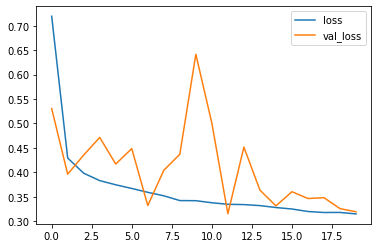

In [14]:
# Plotting results
pd.DataFrame(history.history).plot()

In [16]:
# Defining model again
model_2 = tf.keras.models.Sequential(LAYERS)
EPOCHS = 100
LOSS = 'mse'
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Compiling model
model_2.compile(loss=LOSS, optimizer=OPTIMIZER)

# Defining callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')
CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

# Fitting model
history = model_2.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), callbacks=CALLBACKS)

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3049 - val_loss: 0.3197
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3037 - val_loss: 0.3199
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3034 - val_loss: 0.3216
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3034 - val_loss: 0.3224
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3029 - val_loss: 0.3250
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3027 - val_loss: 0.3240


In [17]:
# Loading extension of tensorboard
%load_ext tensorboard
%tensorboard --logdir='logs'

$$
\begin{bmatrix}
1 &  3\\
2 & 4 \\
\end{bmatrix}
$$